## 1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


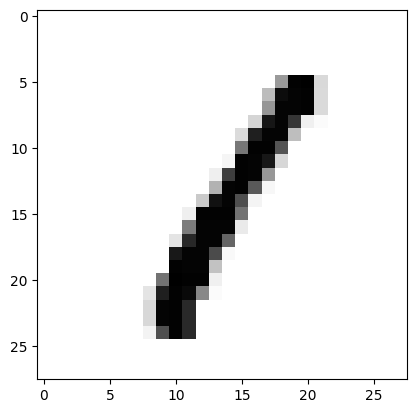

(60000, 28, 28)


In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[3], cmap='Greys')
plt.show()
print(X_train.shape)

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[3]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n') #\ left at back space

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  12425325563 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  96 24425125362 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  12725125125362 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  68 23625121131 8  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  60 22825125194 0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1552532531890  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  20 25325123566 0  0  0 

In [ ]:
# One-Hot Encording
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다. One-Hot Encording
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18358, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18358 to 0.13475, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13475 to 0.11295, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11295 to 0.09895, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09895 to 0.08842, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.08842

Epoch 7: val_loss did not improve from 0.08842

Epoch 8: val_loss improved from 0.08842 to 0.08772, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08772 to 0.07926, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.07926

Epoch 11: val_loss improved from 0.07926 to 0.07887, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.07887

Epoch 13: val_loss improved from 0.07887 to 0.07829, saving model to ./MNIST_MLP.hdf5

Epoch 14: val_loss did not improv

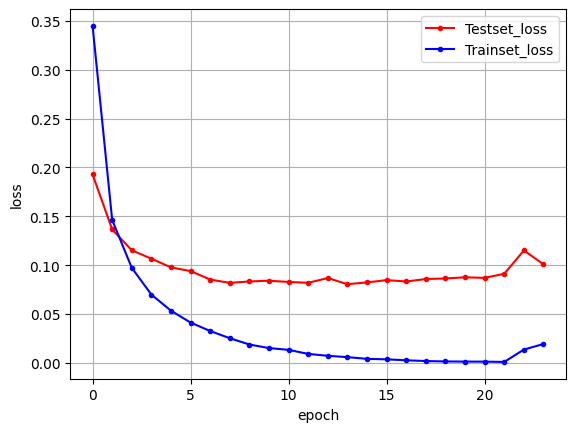

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 5. 컨볼루션 신경망 실행하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

11490434/11490434 [==============================] - 2s 0us/step

Epoch 1: val_loss improved from inf to 0.08590, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08590 to 0.05522, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05522 to 0.04842, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss did not improve from 0.04842

Epoch 5: val_loss improved from 0.04842 to 0.04409, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04409 to 0.04237, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04237 to 0.04161, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04161

Epoch 9: val_loss improved from 0.04161 to 0.03906, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03906

Epoch 11: val_loss did not improve from 0.03906

Epoch 12: val_loss did not improve from 0.03906

Epoch 13: val_loss did not improve from 0.03906

Epoch 14: val_loss did not improve from 0.03

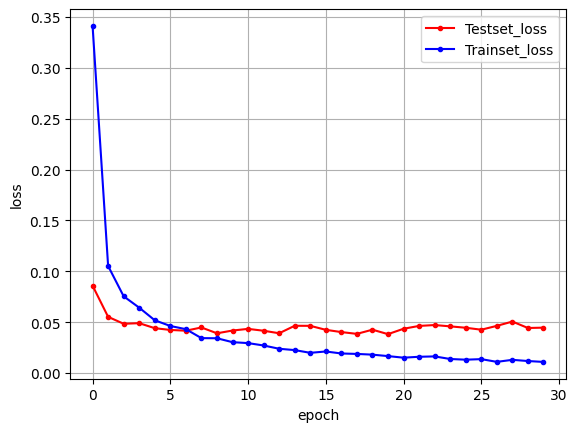

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()